LAB M.103 Sklearn Model TELCO CHURN
Author: Cindy Lund

A Model to predecit churn for a telecommunications company. Customer churn is when customers stop using a company's services. Predicting churn helps companies take proactive measures to retain customers.


In [2]:
#Step 1: Load & Explore the Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import os
os.getcwd()


'c:\\Users\\cindy\\OneDrive\\Documents\\AI Ironhack Coursework\\vscode101\\WEEK01\\Lab M1.03 - sklearn Model Training + Evaluation'

In [4]:
os.listdir()


['feature_distributions.png',
 'knn_k_comparison.png',
 'LAB M. 103 Sklearn Model BREAST Cancer Model.ipynb',
 'LAB M. 103 Sklearn Model Training & Evaluation Report.docx',
 'LAB M1.03 Telco Customer Churn.ipynb',
 'Screenshots Breast Cancer',
 'Screenshots Telco',
 'Telco-Customer-Churn.csv']

In [5]:
import pandas as pd

df = pd.read_csv("Telco-Customer-Churn.csv")
print("Dataset loaded successfully!")
df.shape


Dataset loaded successfully!


(7043, 21)

In [6]:
#Basic exploration (shape, columns, dtypes, missing values)
print("Shape (rows, columns):", df.shape)

print("\nColumns:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0] if (missing > 0).any() else "✓ No missing values found (as NaN).")


Shape (rows, columns): (7043, 21)

Columns:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

Missing values p

In [7]:
# Check Target distribution (how many churned vs not churned)
print("\nTarget distribution (Churn):")
print(df["Churn"].value_counts())
print("\nTarget distribution (percent):")
print((df["Churn"].value_counts(normalize=True) * 100).round(2))



Target distribution (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Target distribution (percent):
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


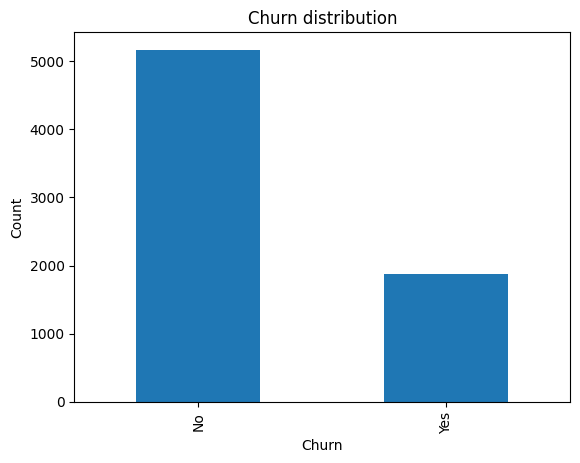

In [8]:
#Quick visuals (simple + useful) Bar chart for target distribution
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


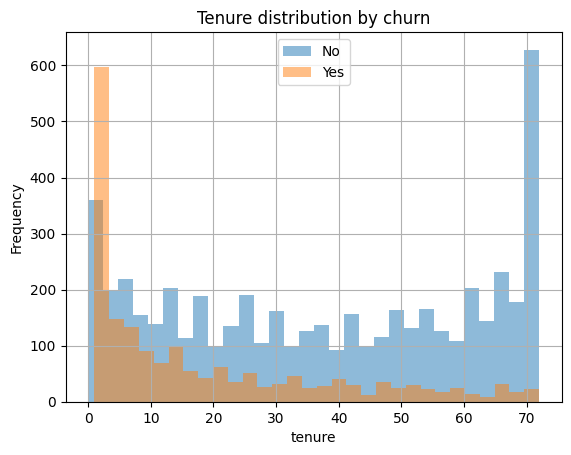

In [9]:
#Tenure distribution by churn (often very informative)
plt.figure()
df[df["Churn"] == "No"]["tenure"].hist(bins=30, alpha=0.5, label="No")
df[df["Churn"] == "Yes"]["tenure"].hist(bins=30, alpha=0.5, label="Yes")
plt.title("Tenure distribution by churn")
plt.xlabel("tenure")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Data Preprocessing (Customer Churn)
Objective

Prepare the churn dataset so it can be used by a KNN classifier (which requires numeric data and no missing values).

In [11]:
#Inspect data types again (sanity check)
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [12]:
#Fix TotalCharges
# Convert TotalCharges to numeric, forcing invalid values to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check missing values after conversion
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Fix missing values in TotalCharges (if any) - we can use median imputation for simplicity
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
df.isnull().sum()



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
#Convert target variable to binary (0 and 1)
# Convert Churn: Yes -> 1, No -> 0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

df["Churn"].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [17]:
#drop customerID (not useful for modeling)
df.drop("customerID", axis=1, inplace=True)


In [18]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.shape


(7043, 31)

In [20]:
#Separate features and target
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (7043, 30)
Target shape: (7043,)


In [21]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split


In [22]:
#Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [23]:
#Verfy the split size and feature count
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

print("Training features:", X_train.shape[1])
print("Test features:", X_test.shape[1])


Training set size: 5634
Test set size: 1409
Training features: 30
Test features: 30


In [24]:
#Verfify class distribution in both sets (should be similar due to stratification)
print("\nTraining set churn distribution:")
print(y_train.value_counts())
print((y_train.value_counts(normalize=True) * 100).round(2))

print("\nTest set churn distribution:")
print(y_test.value_counts())
print((y_test.value_counts(normalize=True) * 100).round(2))



Training set churn distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64

Test set churn distribution:
Churn
0    1035
1     374
Name: count, dtype: int64
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [25]:
#Step 4: Train a KNN Model (Churn)
from sklearn.neighbors import KNeighborsClassifier


In [26]:
# Create KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)


In [27]:
#Train the KNN model
knn.fit(X_train, y_train)

print("KNN model trained successfully!")
print(f"Number of neighbors (K): {knn.n_neighbors}")


KNN model trained successfully!
Number of neighbors (K): 5


In [28]:
# Make predictions to confirm the model works
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("Training predictions:", len(y_train_pred))
print("Test predictions:", len(y_test_pred))


Training predictions: 5634
Test predictions: 1409


In [29]:
#Step 5: Make Predictions and Evaluate (Customer Churn)
y_test_pred = knn.predict(X_test)


In [30]:
#Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label=1)
recall = recall_score(y_test, y_test_pred, pos_label=1)

print("=== Model Performance ===")
print(f"Test Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall:    {recall:.4f}")


=== Model Performance ===
Test Accuracy:  0.7658 (76.58%)
Test Precision: 0.5791
Test Recall:    0.4305


In [31]:
#Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("\n=== Confusion Matrix (rows=Actual, cols=Predicted) ===")
print("               Predicted")
print("            No Churn  Churn")
print(f"Actual No Churn   {conf_matrix[0,0]:4d}     {conf_matrix[0,1]:4d}")
print(f"Actual Churn      {conf_matrix[1,0]:4d}     {conf_matrix[1,1]:4d}")



=== Confusion Matrix (rows=Actual, cols=Predicted) ===
               Predicted
            No Churn  Churn
Actual No Churn    918      117
Actual Churn       213      161


In [32]:
#Classification report (precision, recall, f1-score)
print("\n=== Classification Report ===")
print(classification_report(
    y_test,
    y_test_pred,
    target_names=["No Churn", "Churn"]
))



=== Classification Report ===
              precision    recall  f1-score   support

    No Churn       0.81      0.89      0.85      1035
       Churn       0.58      0.43      0.49       374

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.75      0.77      0.75      1409



In [33]:
#Show example predictions
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_test_pred
})

comparison_df["Actual Label"] = comparison_df["Actual"].map({0: "No Churn", 1: "Churn"})
comparison_df["Predicted Label"] = comparison_df["Predicted"].map({0: "No Churn", 1: "Churn"})

comparison_df.head(10)


,Actual,Predicted,Actual Label,Predicted Label
0,0,0,No Churn,No Churn
1,0,1,No Churn,Churn
2,0,0,No Churn,No Churn
3,0,1,No Churn,Churn
4,0,0,No Churn,No Churn
5,0,1,No Churn,Churn
6,0,0,No Churn,No Churn
7,0,0,No Churn,No Churn
8,0,0,No Churn,No Churn
9,1,0,Churn,No Churn


In [34]:
#Experiment and Improve (Customer Churn)
#Experiment with different K values (e.g., K=3, K=7) and compare performance
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("\n" + "="*50)
print("EXPERIMENTING WITH DIFFERENT K VALUES (CHURN)")
print("="*50)

k_values = [1, 3, 5, 7, 9, 11, 15]
results = []

for k in k_values:
    # Create and train KNN model
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    
    # Predict on test set
    y_pred_temp = knn_temp.predict(X_test)
    
    # Calculate metrics (positive class = churn = 1)
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp, pos_label=1)
    rec = recall_score(y_test, y_pred_temp, pos_label=1)
    
    results.append({
        "K": k,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    })
    
    print(f"K={k:2d}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")



EXPERIMENTING WITH DIFFERENT K VALUES (CHURN)
K= 1: Accuracy=0.7119, Precision=0.4570, Recall=0.4545
K= 3: Accuracy=0.7622, Precision=0.5657, Recall=0.4492
K= 5: Accuracy=0.7658, Precision=0.5791, Recall=0.4305
K= 7: Accuracy=0.7814, Precision=0.6260, Recall=0.4385
K= 9: Accuracy=0.7885, Precision=0.6532, Recall=0.4332
K=11: Accuracy=0.7871, Precision=0.6623, Recall=0.4037
K=15: Accuracy=0.7885, Precision=0.6681, Recall=0.4037


In [35]:
#Compare results in a DataFrame or Table
results_df = pd.DataFrame(results)
results_df


,K,Accuracy,Precision,Recall
0,1,0.711852,0.456989,0.454545
1,3,0.762243,0.565657,0.449198
2,5,0.765791,0.579137,0.430481
3,7,0.781405,0.625954,0.438503
4,9,0.788502,0.653226,0.433155
5,11,0.787083,0.662281,0.403743
6,15,0.788502,0.668142,0.403743


In [36]:
#Choose the best K based on the metrics (e.g., highest recall for churn class) and retrain the model with that K
best_k_recall = results_df.loc[results_df["Recall"].idxmax(), "K"]
best_recall = results_df["Recall"].max()

print(f"Best K based on Recall: {best_k_recall} (Recall = {best_recall:.4f})")


Best K based on Recall: 1 (Recall = 0.4545)


In [37]:
#Best K based on recall is often preferred in churn prediction to minimize false negatives (missing actual churners). We can retrain the model with this K if desired.
best_k_accuracy = results_df.loc[results_df["Accuracy"].idxmax(), "K"]
best_accuracy = results_df["Accuracy"].max()

print(f"Best K based on Accuracy: {best_k_accuracy} (Accuracy = {best_accuracy:.4f})")


Best K based on Accuracy: 9 (Accuracy = 0.7885)


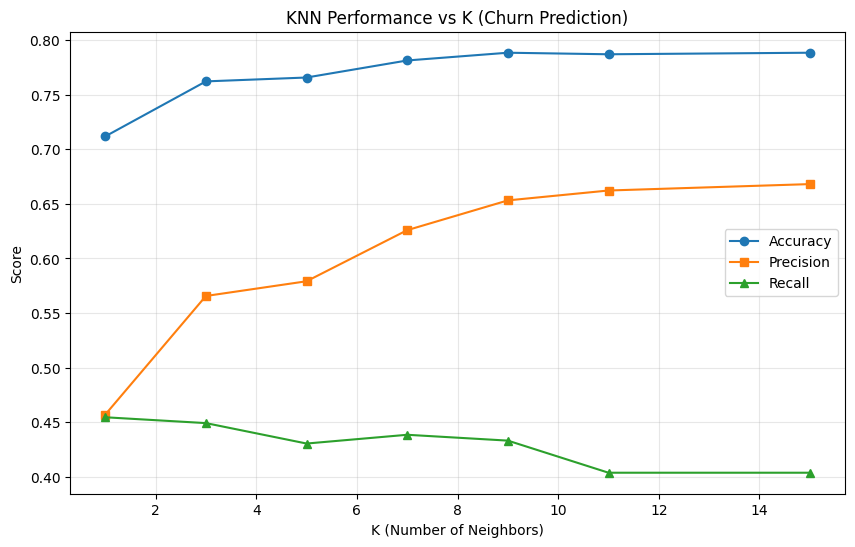

In [38]:
#isualize performance vs K
plt.figure(figsize=(10, 6))
plt.plot(results_df["K"], results_df["Accuracy"], marker="o", label="Accuracy")
plt.plot(results_df["K"], results_df["Precision"], marker="s", label="Precision")
plt.plot(results_df["K"], results_df["Recall"], marker="^", label="Recall")

plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Score")
plt.title("KNN Performance vs K (Churn Prediction)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
